## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [8]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [9]:
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
from keras.regularizers import l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=0.0, l2_ratio=0.0):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 10
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]

In [14]:
import itertools

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for l1r, l2r in itertools.product(L1_EXP, L2_EXP):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with L1 = %.15f, L2 = %.15f" % (l1r, l2r))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=l1r, l2_ratio=l2r)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l1-%s-l2-%s" % (str(l1r), str(l2r))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with L1 = 0.010000, L2 = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/500

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 11s 224us/step - loss: 198.7204 - accuracy: 0.2379 - val_loss: 41.1619 - val_accuracy: 0.2551
Epoch 2/10
50000/50000 [==============================] - 11s 221us/step - loss: 19.1521 - accuracy: 0.1131 - val_loss: 7.3189 - val_accuracy: 0.1000
Epoch 3/10
50000/50000 [==============================] - 11s 224us/step - loss: 4.1271 - accuracy: 0.0983 - val_loss: 2.6546 - val_accuracy: 0.1000
Epoch 4/10
50000/50000 [==============================] - 11s 223us/step - loss: 2.4872 - accuracy: 0.0963 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 5/10
50000/50000 [==============================] - 11s 230us/step - loss: 2.4626 - accuracy: 0.0971 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 6/10
50000/50000 [==============================] - 11s 227us/step - loss: 2.4626 - accuracy: 0.0983 - val_loss: 2.4627 - val_accuracy: 0.1000
Epoch 7/10
50000/50000 [============================

50000/50000 [==============================] - 11s 223us/step - loss: 5.7113 - accuracy: 0.3895 - val_loss: 5.6424 - val_accuracy: 0.4033
Epoch 4/10
50000/50000 [==============================] - 11s 225us/step - loss: 5.5827 - accuracy: 0.4115 - val_loss: 5.5208 - val_accuracy: 0.4215
Epoch 5/10
50000/50000 [==============================] - 11s 226us/step - loss: 5.4656 - accuracy: 0.4270 - val_loss: 5.4143 - val_accuracy: 0.4304
Epoch 6/10
50000/50000 [==============================] - 11s 224us/step - loss: 5.3567 - accuracy: 0.4427 - val_loss: 5.3201 - val_accuracy: 0.4378
Epoch 7/10
50000/50000 [==============================] - 11s 227us/step - loss: 5.2571 - accuracy: 0.4530 - val_loss: 5.2158 - val_accuracy: 0.4531
Epoch 8/10
50000/50000 [==============================] - 11s 226us/step - loss: 5.1608 - accuracy: 0.4651 - val_loss: 5.1461 - val_accuracy: 0.4477
Epoch 9/10
50000/50000 [==============================] - 11s 225us/step - loss: 5.0684 - accuracy: 0.4714 - val_loss

50000/50000 [==============================] - 10s 202us/step - loss: 5.3559 - accuracy: 0.4254 - val_loss: 5.3105 - val_accuracy: 0.4283
Epoch 6/10
50000/50000 [==============================] - 10s 199us/step - loss: 5.2544 - accuracy: 0.4392 - val_loss: 5.2148 - val_accuracy: 0.4406
Epoch 7/10
50000/50000 [==============================] - 10s 202us/step - loss: 5.1575 - accuracy: 0.4510 - val_loss: 5.1316 - val_accuracy: 0.4500
Epoch 8/10
50000/50000 [==============================] - 10s 201us/step - loss: 5.0680 - accuracy: 0.4604 - val_loss: 5.0378 - val_accuracy: 0.4549
Epoch 9/10
50000/50000 [==============================] - 10s 207us/step - loss: 4.9798 - accuracy: 0.4707 - val_loss: 4.9718 - val_accuracy: 0.4583
Epoch 10/10
50000/50000 [==============================] - 10s 209us/step - loss: 4.8975 - accuracy: 0.4775 - val_loss: 4.9067 - val_accuracy: 0.4623
Experiment with L1 = 0.000000, L2 = 0.010000
Model: "model_1"
______________________________________________________

50000/50000 [==============================] - 11s 223us/step - loss: 1.5483 - accuracy: 0.4570 - val_loss: 1.5441 - val_accuracy: 0.4523
Epoch 8/10
50000/50000 [==============================] - 11s 222us/step - loss: 1.5160 - accuracy: 0.4680 - val_loss: 1.5209 - val_accuracy: 0.4641
Epoch 9/10
50000/50000 [==============================] - 11s 224us/step - loss: 1.4881 - accuracy: 0.4789 - val_loss: 1.5088 - val_accuracy: 0.4630
Epoch 10/10
50000/50000 [==============================] - 11s 226us/step - loss: 1.4604 - accuracy: 0.4879 - val_loss: 1.4787 - val_accuracy: 0.4766
Experiment with L1 = 0.000000, L2 = 0.000000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
______________________

50000/50000 [==============================] - 11s 230us/step - loss: 5.4758 - accuracy: 0.4212 - val_loss: 5.1903 - val_accuracy: 0.4259
Epoch 10/10
50000/50000 [==============================] - 11s 229us/step - loss: 4.9312 - accuracy: 0.4287 - val_loss: 4.6894 - val_accuracy: 0.4291
Experiment with L1 = 0.000000, L2 = 0.000100
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
________________________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 10s 207us/step - loss: 2.0265 - accuracy: 0.2768 - val_loss: 1.8673 - val_accuracy: 0.3264
Epoch 2/10
50000/50000 [==============================] - 10s 200us/step - loss: 1.7962 - accuracy: 0.3695 - val_loss: 1.7502 - val_accuracy: 0.3926
Epoch 3/10
50000/50000 [==============================] - 11s 210us/step - loss: 1.7100 - accuracy: 0.4007 - val_loss: 1.6798 - val_accuracy: 0.4161
Epoch 4/10
50000/50000 [==============================] - 10s 204us/step - loss: 1.6495 - accuracy: 0.4231 - val_loss: 1.6296 - val_accuracy: 0.4253
Epoch 5/10
50000/50000 [==============================] - 10s 204us/step - loss: 1.6030 - accuracy: 0.4407 - val_loss: 1.5979 - val_accuracy: 0.4422
Epoch 6/10
50000/50000 [==============================] - 11s 212us/step - loss: 1.5629 - accuracy: 0.4541 - val_loss: 1.5764 - val_accuracy: 0.4432
Epoch 7/10
50000/50000 [==============================] 

50000/50000 [==============================] - 10s 202us/step - loss: 1.7260 - accuracy: 0.3952 - val_loss: 1.6973 - val_accuracy: 0.4015
Epoch 4/10
50000/50000 [==============================] - 10s 198us/step - loss: 1.6660 - accuracy: 0.4168 - val_loss: 1.6465 - val_accuracy: 0.4221
Epoch 5/10
50000/50000 [==============================] - 10s 200us/step - loss: 1.6168 - accuracy: 0.4325 - val_loss: 1.5995 - val_accuracy: 0.4349
Epoch 6/10
50000/50000 [==============================] - 10s 198us/step - loss: 1.5766 - accuracy: 0.4474 - val_loss: 1.5713 - val_accuracy: 0.4461
Epoch 7/10
50000/50000 [==============================] - 10s 200us/step - loss: 1.5438 - accuracy: 0.4580 - val_loss: 1.5421 - val_accuracy: 0.4532
Epoch 8/10
50000/50000 [==============================] - 10s 199us/step - loss: 1.5126 - accuracy: 0.4682 - val_loss: 1.5207 - val_accuracy: 0.4643
Epoch 9/10
50000/50000 [==============================] - 10s 197us/step - loss: 1.4851 - accuracy: 0.4793 - val_loss

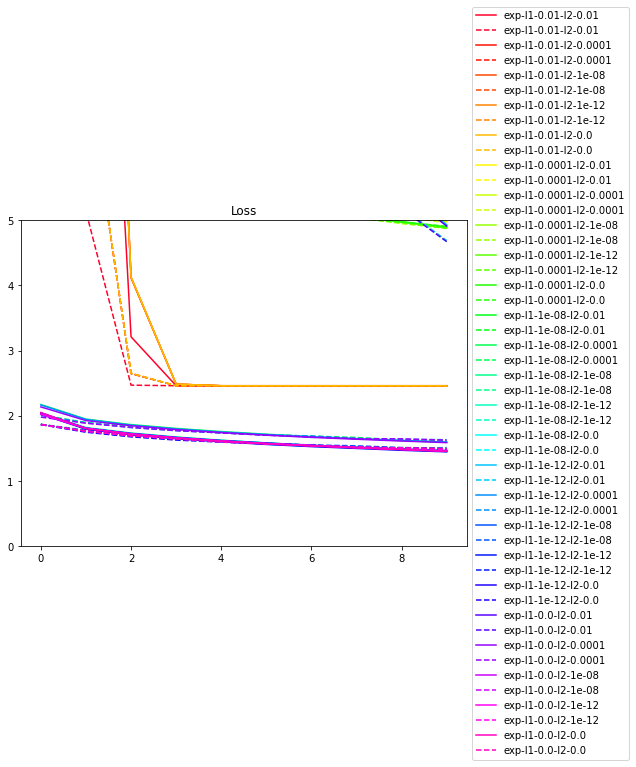

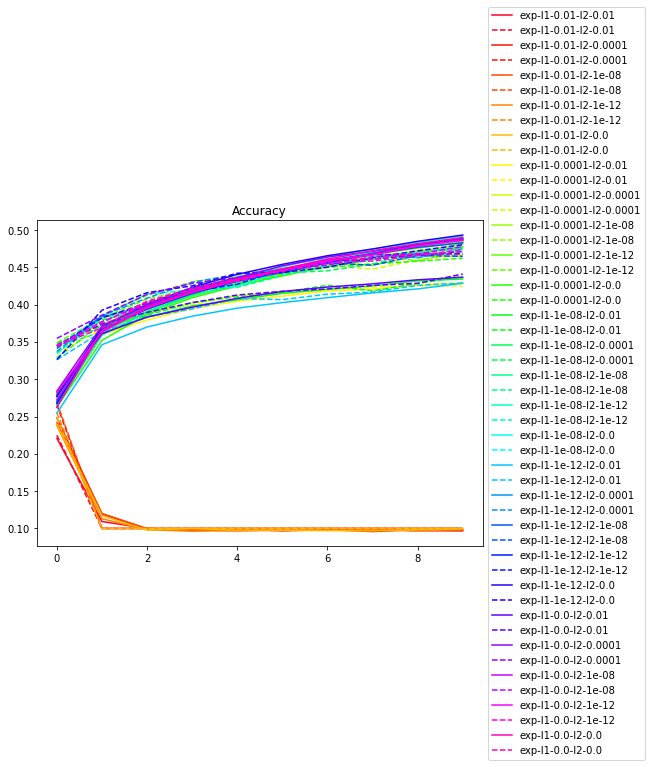

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.cm as mplcm
import matplotlib.colors as colors
NUM_COLORS = 25

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()